In [47]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import yfinance as yf

import time

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import linear_model

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
start_day = "2022-01-01"
# вариант 16
assetList = ["alCCL", "CDAY", "CDNS", "CDW", "CE", "CF", "CFG", "CHD", "CHRW", "CHTR", "CI", "CINF"]
"""
alCCL Carnival Corporation Consumer Discretionary
CDAY Ceridian Information Technology
CDNS Cadence Design Systems Information Technology
CDW Information CDW Technology
CE Celanese Materials
CF Industries CF Materials
CFG Citizens Financial Group Financials
CHD Church & Dwight Consumer Staples
CHRW C. H. Robinson Industrials
CHTR Charter Communications Communication Services
CI Cigna Health Care
CINF Cincinnati Financi Financials
"""

'\nalCCL Carnival Corporation Consumer Discretionary\nCDAY Ceridian Information Technology\nCDNS Cadence Design Systems Information Technology\nCDW Information CDW Technology\nCE Celanese Materials\nCF Industries CF Materials\nCFG Citizens Financial Group Financials\nCHD Church & Dwight Consumer Staples\nCHRW C. H. Robinson Industrials\nCHTR Charter Communications Communication Services\nCI Cigna Health Care\nCINF Cincinnati Financi Financials\n'

In [14]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()

    returns = yf.Ticker(company)

    data = returns.history(period="1y",start=start_day)

    df.index=data.index

    df[company]=data.Close

    return df

In [15]:
data = pd.DataFrame()
for company in assetList:
    asset = get_One_Asset(company,start_day)
    data = pd.concat([data,asset],axis = 1)

ERROR:yfinance:ALCCL: No timezone found, symbol may be delisted
ERROR:yfinance:CDAY: No timezone found, symbol may be delisted


In [16]:
data.head()

,alCCL,CDAY,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
Date,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,NaN,NaN,183.160004,199.641693,159.098831,67.623253,44.156231,99.019661,102.004173,647.580017,225.316269,106.501587
2022-01-04 00:00:00-05:00,NaN,NaN,178.300003,202.679993,163.553833,68.140572,46.160065,99.126740,104.348663,640.770020,224.450424,108.977928
2022-01-05 00:00:00-05:00,NaN,NaN,172.619995,198.200439,165.111725,66.071350,45.809616,99.827713,103.668015,624.859985,227.548279,107.443161
2022-01-06 00:00:00-05:00,NaN,NaN,173.119995,200.810272,163.107391,66.330002,48.343616,99.993202,104.887520,631.950012,218.908890,109.429893
2022-01-07 00:00:00-05:00,NaN,NaN,166.020004,193.185318,163.449387,66.234215,48.721020,100.859673,102.505226,610.489990,224.334961,111.708504


In [18]:
# удалим отсутствующие значения
del data["alCCL"]
del data["CDAY"]

In [19]:
# Нормируем данные
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)

In [21]:
data.head()

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
0,-0.428914,0.397695,1.715005,-1.360350,1.629420,1.028823,1.092309,2.776056,-1.614039,-0.018786
1,-0.524235,0.516833,1.929853,-1.315237,1.941590,1.041445,1.349751,2.696401,-1.640057,0.237526
2,-0.635638,0.341181,2.004985,-1.495682,1.886995,1.124073,1.275011,2.510306,-1.546967,0.078671
3,-0.625832,0.443517,1.908323,-1.473127,2.281757,1.143580,1.408921,2.593236,-1.806581,0.284306
4,-0.765086,0.144528,1.924816,-1.481480,2.340552,1.245716,1.147328,2.342224,-1.643527,0.520152


In [26]:
# Применим метод главных компонент
pca = PCA()
pca.fit(data)
print('Explained variance by factors:\n', pca.explained_variance_.round(2))

Explained variance by factors:
 [4.06 2.89 1.44 0.52 0.38 0.32 0.16 0.14 0.08 0.02]


In [27]:
pca_factors = pd.DataFrame(pca.transform(data),
                           columns=['pca.f{}'.format(i+1) for i in range(pca.n_components_)],
                           index=data.index)
pca_factors.head()

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9,pca.f10
0,-1.318931,3.524805,1.312969,1.188626,1.657838,0.351733,0.306697,-0.170411,0.228808,0.066036
1,-1.437907,3.845626,1.068845,1.206746,1.607667,0.689116,0.318113,-0.083514,0.210881,0.148040
2,-1.367491,3.730527,1.219919,1.294852,1.518724,0.705985,0.049465,0.013459,0.372646,0.173802
3,-1.597909,4.024077,1.134070,1.413152,1.459729,0.865396,0.156354,-0.055865,0.048026,0.172165
4,-1.546845,4.036382,1.002321,1.396462,1.021044,0.757440,-0.151002,0.002242,0.144477,0.101297


<Axes: >

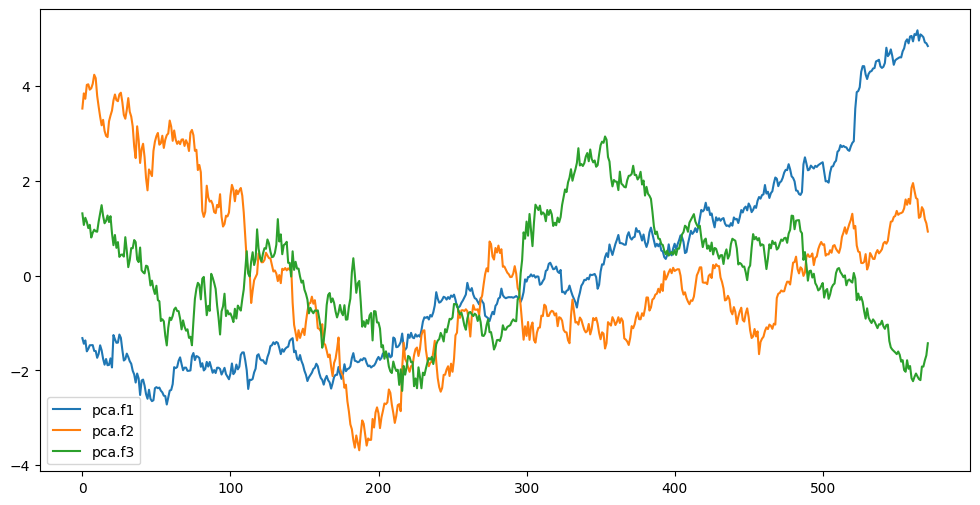

In [39]:
# отрисуем три первых фактора
pca_factors[['pca.f1', 'pca.f2','pca.f3']].plot(figsize=(12,6))

In [40]:
# получим вектора нагрузок
pca_loadings = pd.DataFrame(pca.components_)
pca_loadings = pca_loadings.transpose()
pca_loadings.columns = ['pca.l{}'.format(i+1) for i in range(pca.n_components_)]
pca_loadings

,pca.l1,pca.l2,pca.l3,pca.l4,pca.l5,pca.l6,pca.l7,pca.l8,pca.l9,pca.l10
0,0.477660,-0.015266,0.079869,-0.154257,0.219696,0.133943,0.197279,0.037591,-0.374070,-0.703539
1,0.448718,0.115633,-0.185482,0.140666,0.259643,0.177959,0.455706,-0.190682,-0.200870,0.589602
2,0.213976,0.490252,-0.116785,0.002988,0.263648,0.058495,-0.083826,0.657114,0.434093,-0.005009
3,-0.205205,-0.121893,-0.638812,-0.503935,0.272253,-0.287707,-0.080864,0.150456,-0.298661,0.075698
4,-0.233361,0.336871,-0.391239,0.597575,0.013178,0.255614,-0.282033,-0.061677,-0.380284,-0.168590
5,0.238157,0.421441,0.280213,-0.357277,0.054472,-0.009837,-0.618776,-0.301991,-0.207327,0.198423
6,-0.416325,0.000043,0.087225,-0.334102,0.291905,0.768784,0.093996,-0.096497,0.114257,-0.001533
7,-0.289087,0.403099,0.089739,0.061169,0.444713,-0.430658,0.290523,-0.434201,0.209924,-0.204713
8,0.338400,-0.231098,-0.465907,0.025473,0.047418,0.125384,-0.270796,-0.445346,0.542831,-0.173382
9,-0.003199,0.473500,-0.270517,-0.318906,-0.672547,0.080881,0.332943,-0.128890,0.051958,-0.109005


PCA loadings: 
      pca.l1    pca.l2    pca.l3
0  0.477660 -0.015266  0.079869
1  0.448718  0.115633 -0.185482
2  0.213976  0.490252 -0.116785
3 -0.205205 -0.121893 -0.638812
4 -0.233361  0.336871 -0.391239
5  0.238157  0.421441  0.280213
6 -0.416325  0.000043  0.087225
7 -0.289087  0.403099  0.089739
8  0.338400 -0.231098 -0.465907
9 -0.003199  0.473500 -0.270517


<Axes: >

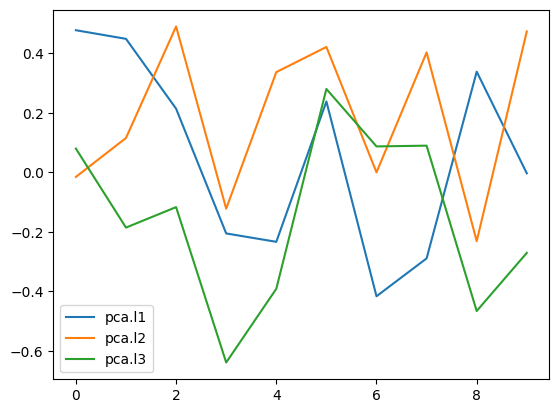

In [43]:
# Отрисуем три первых вектора нагрузок
print('PCA loadings: \n',pca_loadings.iloc[:,0:3])
pca_loadings.plot(y=['pca.l1','pca.l2','pca.l3'])

Loadings by regression: 
      reg.l1    reg.l2    reg.l3
0  0.477660 -0.015266  0.079869
1  0.448718  0.115633 -0.185482
2  0.213976  0.490252 -0.116785
3 -0.205205 -0.121893 -0.638812
4 -0.233361  0.336871 -0.391239
5  0.238157  0.421441  0.280213
6 -0.416325  0.000043  0.087225
7 -0.289087  0.403099  0.089739
8  0.338400 -0.231098 -0.465907
9 -0.003199  0.473500 -0.270517


<Axes: >

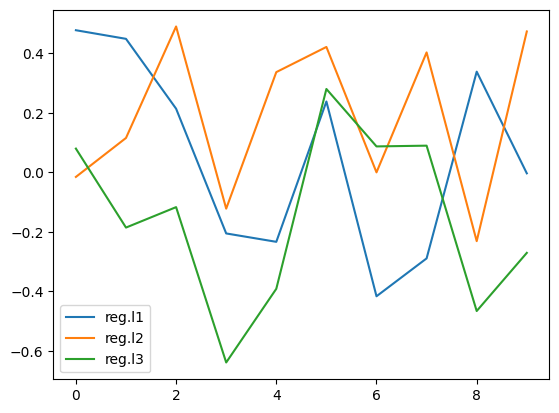

In [46]:
# Посчитаем нагрузки, используя линейную регрессию

regr = linear_model.LinearRegression()

# Train the models for both factors
rf1 = regr.fit(data, pca_factors['pca.f1'])
reg_l1 =pd.DataFrame({'reg.l1': rf1.coef_})

rf2 = regr.fit(data, pca_factors['pca.f2'])
reg_l2 =pd.DataFrame({'reg.l2': rf2.coef_})

rf3 = regr.fit(data, pca_factors['pca.f3'])
reg_l3 =pd.DataFrame({'reg.l3': rf3.coef_})

loadings_by_regression = reg_l1.join([reg_l2,reg_l3])
print('Loadings by regression: \n',loadings_by_regression)
loadings_by_regression.plot(y=['reg.l1','reg.l2','reg.l3'])

Как видим, нагрузки полученные через регрессию те же что и из метода главных компонент

In [48]:
# построим автоэнкодер

encoding_dim = 3
# encode:
input_layer = Input(shape=(data.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(data.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 encoder (Functional)        (None, 3)                 30        
                                                                 
 decoder (Functional)        (None, 10)                30        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
autoencoder.fit(data, data,
                verbose=0,
                epochs=6000,
                batch_size=data.shape[0])

In [50]:
# получим факторы используя автоэнкодер
encoded_rates = pd.DataFrame(encoder.predict(data), index=data.index, columns=['ae.f1', 'ae.f2','ae.f3'])
print(encoded_rates.head())

18/18 [==============================] - 0s 5ms/step
      ae.f1     ae.f2     ae.f3
0  3.200391 -1.545465  0.155472
1  3.317880 -1.881746 -0.072552
2  3.300761 -1.715158  0.061479
3  3.631533 -1.895050 -0.156827
4  3.497871 -2.008298 -0.191771


<Axes: >

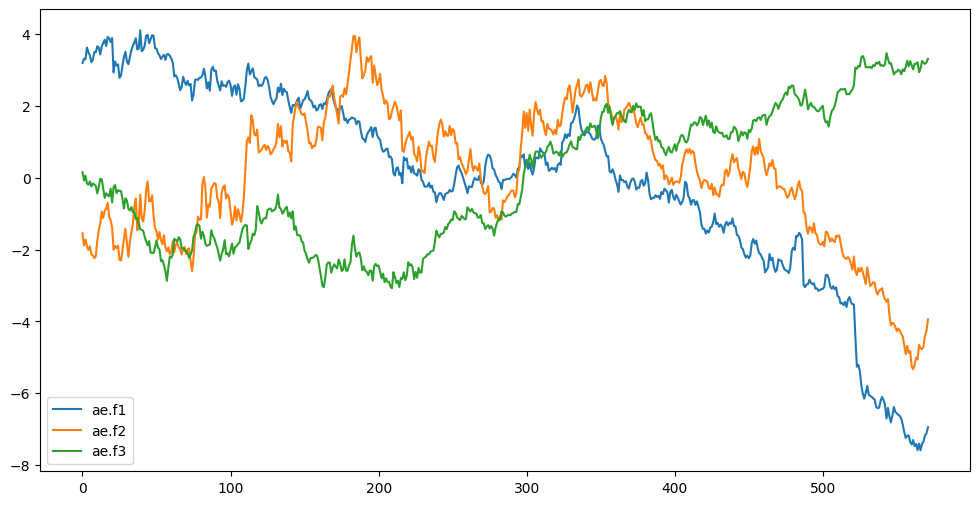

In [53]:
# отрисуем эти факторы
encoded_plot = encoded_rates[['ae.f1', 'ae.f2', 'ae.f3']]
encoded_plot.plot(figsize=(12,6))

Autoencoder loadings by regression: 
     rega.l1   rega.l2   rega.l3
0 -0.766132 -0.324342  0.548072
1 -0.544212 -0.311378  0.202818
2 -0.232534 -0.573753  0.169106
3 -0.046983 -0.139288 -0.620743
4  0.159531 -0.417909 -0.395965
5  0.031624 -0.227388  0.382333
6  0.569580  0.229049 -0.288185
7  0.415624 -0.225495 -0.091084
8 -0.838207 -0.318008  0.004165
9 -0.094262 -0.594668 -0.087578


<Axes: >

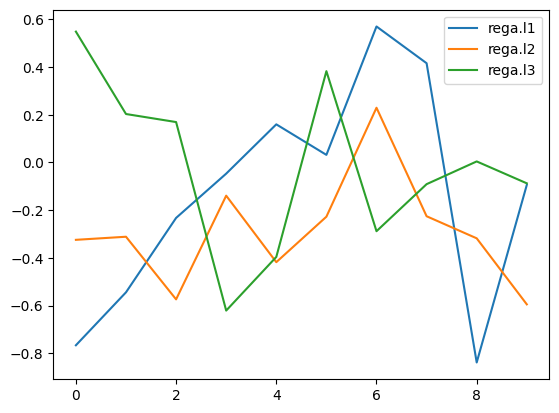

In [54]:
# вычислим нагрузки полученных факторов используя линейную регрессию
rfa1 = regr.fit(data, encoded_rates['ae.f1'])
rega_l1 =pd.DataFrame({'rega.l1': rfa1.coef_})

rfa2 = regr.fit(data, encoded_rates['ae.f2'])
rega_l2 =pd.DataFrame({'rega.l2': rfa2.coef_})

rfa3 = regr.fit(data, encoded_rates['ae.f3'])
rega_l3 =pd.DataFrame({'rega.l3': rfa3.coef_})

ae_loadings_by_regression = rega_l1.join([rega_l2,rega_l3])
print('Autoencoder loadings by regression: \n',ae_loadings_by_regression)
ae_loadings_by_regression.plot(y=['rega.l1','rega.l2','rega.l3'])

Нагрузки не совпадают с полученными в PCA

In [55]:
# проверим нагрузки на коррелированность
pd.concat([pca_factors, encoded_rates], axis=1).corr().round(2)

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9,pca.f10,ae.f1,ae.f2,ae.f3
pca.f1,1.00,0.00,-0.00,0.0,-0.0,-0.0,-0.00,-0.00,-0.00,0.00,-0.96,-0.52,0.91
pca.f2,0.00,1.00,-0.00,-0.0,-0.0,-0.0,-0.00,0.00,-0.00,0.00,0.14,-0.76,0.11
pca.f3,-0.00,-0.00,1.00,-0.0,-0.0,0.0,-0.00,-0.00,0.00,0.00,0.24,0.39,0.40
pca.f4,0.00,-0.00,-0.00,1.0,-0.0,-0.0,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
pca.f5,-0.00,-0.00,-0.00,-0.0,1.0,-0.0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
pca.f6,-0.00,-0.00,0.00,-0.0,-0.0,1.0,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
pca.f7,-0.00,-0.00,-0.00,-0.0,0.0,0.0,1.00,-0.00,0.00,-0.00,-0.01,-0.01,0.01
pca.f8,-0.00,0.00,-0.00,-0.0,-0.0,0.0,-0.00,1.00,-0.00,0.00,0.01,0.01,-0.00
pca.f9,-0.00,-0.00,0.00,0.0,0.0,0.0,0.00,-0.00,1.00,0.00,-0.01,-0.01,0.00
pca.f10,0.00,0.00,0.00,0.0,-0.0,-0.0,-0.00,0.00,0.00,1.00,0.01,0.02,-0.01


PCA факторы некоррелированны
факторы из Автоэнкодера коррелированны, повернем их необходимым образом

In [61]:
encoded_rates

,ae.f1,ae.f2,ae.f3
0,3.200391,-1.545465,0.155472
1,3.317880,-1.881746,-0.072552
2,3.300761,-1.715158,0.061479
3,3.631533,-1.895050,-0.156827
4,3.497871,-2.008298,-0.191771
...,...,...,...
567,-7.405558,-4.776498,3.255726
568,-7.351377,-4.696522,3.207168
569,-7.174162,-4.398041,3.173745
570,-7.122451,-4.265333,3.219865


In [56]:
encoded_rates.cov() # autoencoder factors covariance

,ae.f1,ae.f2,ae.f3
ae.f1,7.667216,2.518891,-3.973258
ae.f2,2.518891,3.449076,-1.407347
ae.f3,-3.973258,-1.407347,3.544614


In [57]:
eg_vect_factors = np.linalg.eig(encoded_rates.cov())[1]
eg_vect_factors = pd.DataFrame(eg_vect_factors)
eg_vect_factors # matrix of eigenvectors of covariance matrix

,0,1,2
0,-0.802318,-0.538431,-0.257639
1,-0.350282,0.075219,0.933619
2,0.483310,-0.839306,0.248953


In [62]:
rotated_factors = pd.DataFrame(np.dot(encoded_rates, eg_vect_factors), columns=['rot.f1','rot.f2','rot.f3'])
rotated_factors.head()

,rot.f1,rot.f2,rot.f3
0,-1.951241,-1.969928,-2.228718
1,-2.037917,-1.867101,-2.629712
2,-2.017757,-1.957846,-2.436405
3,-2.325637,-1.966250,-2.743923
4,-2.195618,-1.873472,-2.823917


In [63]:
rotated_factors.cov()

,rot.f1,rot.f2,rot.f3
rot.f1,1.116039e+01,-8.461805e-16,6.968545e-16
rot.f2,-8.461805e-16,1.121818e+00,3.484273e-16
rot.f3,6.968545e-16,3.484273e-16,2.378695e+00


Теперь факторы из автоэнкодера некоррелированны

<Axes: >

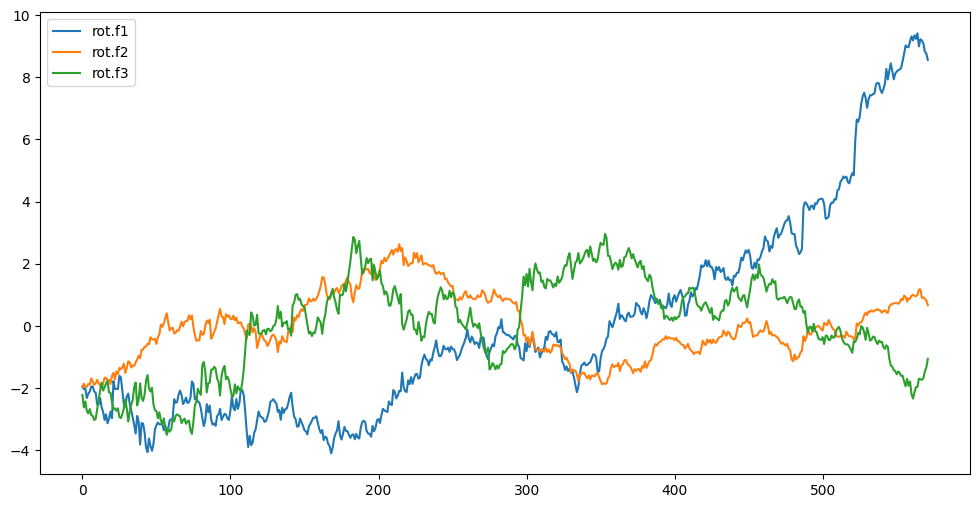

In [64]:
rotated_factors.plot(figsize=(12,6))

<Axes: >

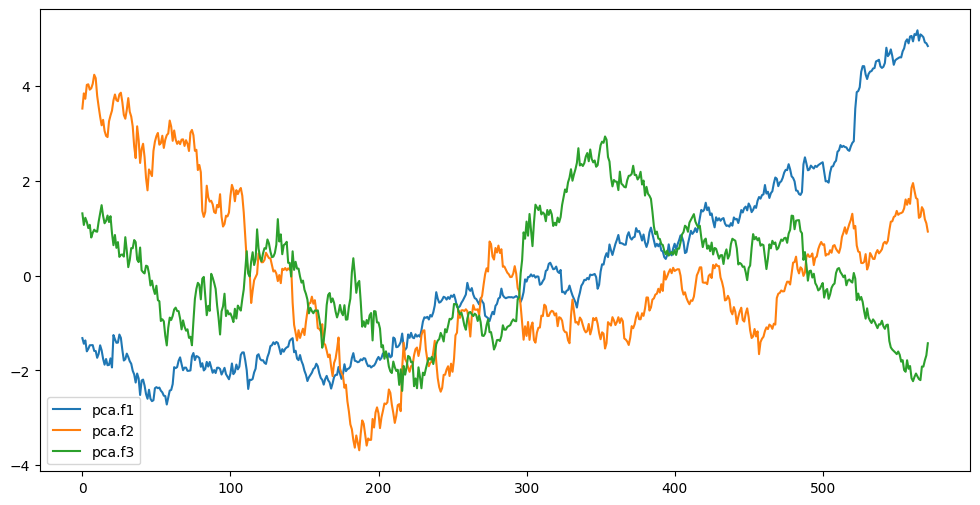

In [65]:
pca_factors[['pca.f1', 'pca.f2','pca.f3']].plot(figsize=(12,6))

In [66]:
def defineOrder(pca_factors,rot_factors):
    pca_cols = pca_factors.columns
    rot_cols = rot_factors.columns
    ncol = len(pca_cols)
    mylist = []
    alllist = []
    i = 0

    for pca_col in pca_cols:
        pcaf =pca_factors[pca_col]
        j = 0
        for rot_col in rot_cols:
            rotf = rot_factors[rot_col]
            cor = np.corrcoef(pcaf,rotf)[0,1]
            print(i,j,abs(cor))
            mylist = []
            mylist.append(i)
            mylist.append(j)
            mylist.append(abs(cor))
            mylist.append(np.sign(cor))
            alllist.append(mylist)
            j = j+1
        i = i +1
    df = pd.DataFrame(alllist,columns = ['col1','col2','value','sign'])
    df = df.sort_values(by=['value'], ascending=False)
    df = df[:ncol]
    df = df.sort_values(by='col1')
    return df

In [67]:
norm_factors = pd.DataFrame()

for i in range(3):
    rotated_factors['rot.f'+str(i+1)] = rotated_factors['rot.f'+str(i+1)] / rotated_factors['rot.f'+str(i+1)].std()
    norm_factors['pca.f'+str(i+1)] = pca_factors['pca.f'+str(i+1)] / pca_factors['pca.f'+str(i+1)].std()


In [68]:
orderdf= defineOrder(norm_factors, rotated_factors)
orderdf

0 0 0.9884338817642542
0 1 0.06993464913942046
0 2 0.133212545126662
1 0 0.08656838431027584
1 1 0.4583505334868238
1 2 0.8844727087954547
2 0 0.12269617487488373
2 1 0.8859932331158775
2 2 0.446988466484051


,col1,col2,value,sign
0,0,0,0.988434,1.0
5,1,2,0.884473,-1.0
7,2,1,0.885993,-1.0


Видим, что:
  - перовму фактору PCA соответствует первый повернутый фактор из автоэнкодера
  - второму фактору PCA соответствует третий помноженный на -1
  - третьем фактору PCA соотвествует второй помноженный на -1



Сравним эти факторы между собой

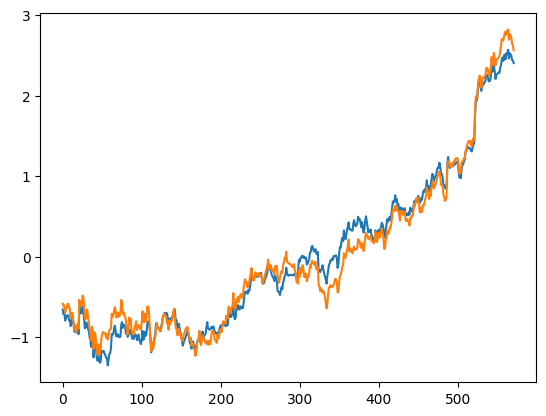

In [69]:
# первый фактор
pca_f_plot = pca_factors['pca.f1']/pca_factors['pca.f1'].std()
rot_f_plot = rotated_factors['rot.f1']/rotated_factors['rot.f1'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

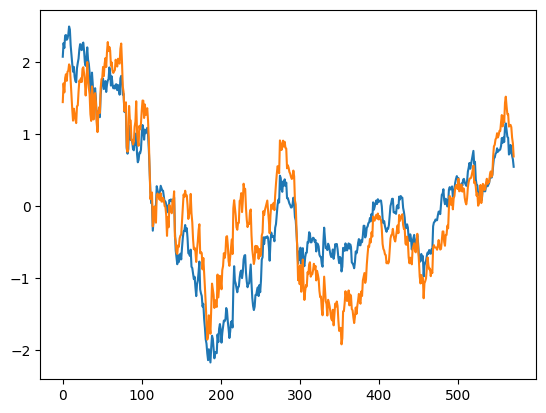

In [70]:
# второй фактор
pca_f_plot = pca_factors['pca.f2']/pca_factors['pca.f2'].std()
rot_f_plot = -rotated_factors['rot.f3']/rotated_factors['rot.f3'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

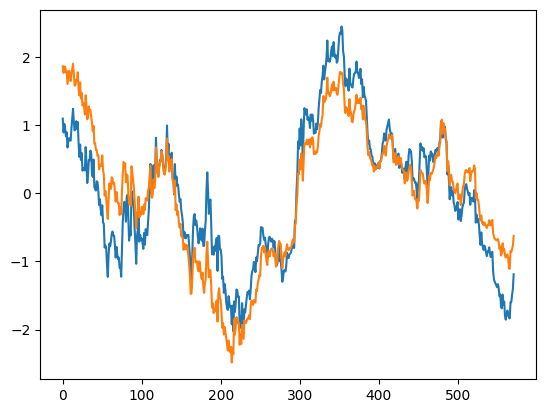

In [71]:
# третий фактор
pca_f_plot = pca_factors['pca.f3']/pca_factors['pca.f3'].std()
rot_f_plot = -rotated_factors['rot.f2']/rotated_factors['rot.f2'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Сравним теперь нагрузки PCA и повернутые нагрузки из автоэнкодера

     rot.l1    rot.l2    rot.l3
0  0.993181 -0.071887  0.031018
1  0.643725  0.099372 -0.100006
2  0.469272 -0.059886 -0.433658
3 -0.213526  0.535813 -0.272473
4 -0.172982  0.215004 -0.529846
5  0.239062 -0.355025 -0.125259
6 -0.676499 -0.047575 -0.004646
7 -0.298497 -0.164299 -0.340283
8  0.785914  0.423901 -0.079906
9  0.241602  0.079528 -0.552710


<Axes: >

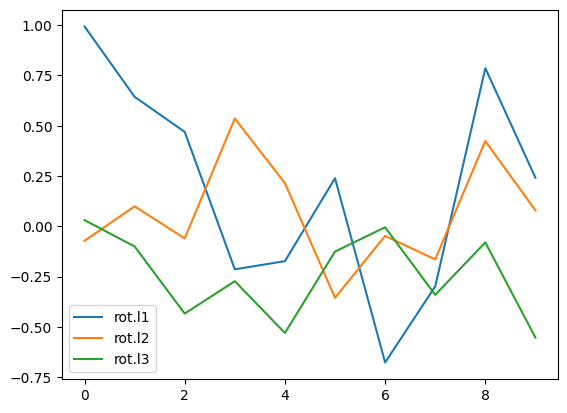

In [72]:
# повернутые нагрузки из автоэнкодера
rotated_loadings = pd.DataFrame(np.dot(ae_loadings_by_regression[['rega.l1','rega.l2','rega.l3']], \
                                       eg_vect_factors),columns=['rot.l1','rot.l2','rot.l3'])
print(rotated_loadings)
rotated_loadings.plot(y=['rot.l1','rot.l2','rot.l3'])

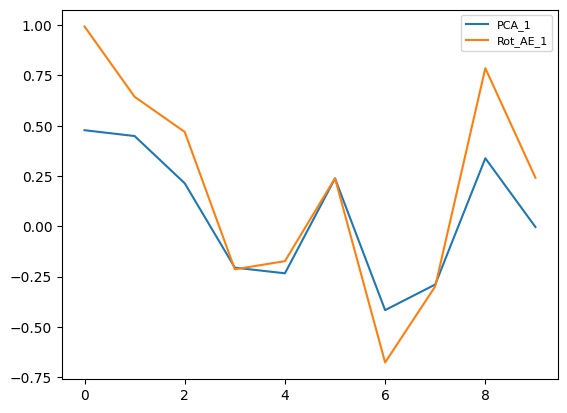

In [81]:
# первые нагрузки
plt.plot(pca_loadings['pca.l1'], label="PCA_1")
plt.plot(rotated_loadings['rot.l1'], label="Rot_AE_1")
plt.legend(fontsize=8)
plt.show()

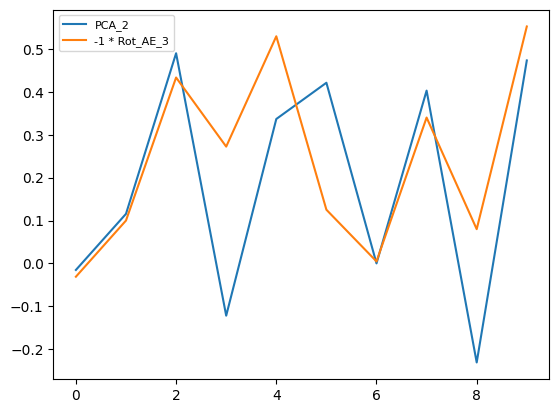

In [82]:
# вторая нагрузка PCA и -1 на третью из автоэнкодера
plt.plot(pca_loadings['pca.l2'], label="PCA_2")
plt.plot(-rotated_loadings['rot.l3'], label="-1 * Rot_AE_3")
plt.legend(fontsize=8)
plt.show()

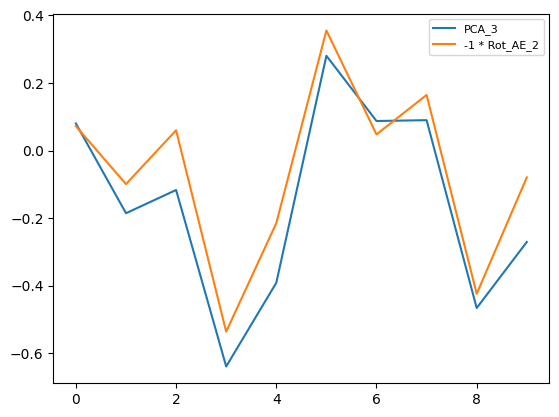

In [83]:
# третья нагрузка PCA и -1 на вторую из автоэнкодера
plt.plot(pca_loadings['pca.l3'], label="PCA_3")
plt.plot(-rotated_loadings['rot.l2'], label="-1 * Rot_AE_2")
plt.legend(fontsize=8)
plt.show()

Нагрузки получилисись очень схожими.